In [9]:
import pandas as pd
import numpy as np

In [10]:
#!unzip "drive/MyDrive/Dog_Breed_Identification_project/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Breed_Identification_project/"

  # Dog Breed Identification Project
  TensorFlow is used

## 1. Problem Statement:
      Identify Dog breed of the given dog's picture.

## 2. Data:
      From Kaggle
      Unstructured Data(Images)

## 3. Evaluation:
      A file with prediction probabilities for each dog breed of each test image.

## 4. Features:
      * There are 120 breeds of dog.
      * 10000+ images in training set. (with labels)
      * 10000+ images in test set. (no labels)
      
      


# Getting workspace Ready

  * Import TensorFlow 2.x
  * Import TensorFlow Hub
  * Use GPU

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version: ",tf.__version__)
print("TensorFlow Hub version:",hub.__version__)

# Check GPU availability
print("GPU", "available!!!" if tf.config.list_physical_devices("GPU") else "not available!!!")

TensorFlow version:  2.17.1
TensorFlow Hub version: 0.16.1
GPU not available!!!


# Getting Data Ready (Turning It into Tensors)
   Turning Data (Images) into Tensors i.e. Numerical Representation.

In [12]:
import pandas as pd
labels_csv=pd.read_csv("drive/MyDrive/Dog_Breed_Identification_project/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
labels_csv["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


<Axes: xlabel='breed'>

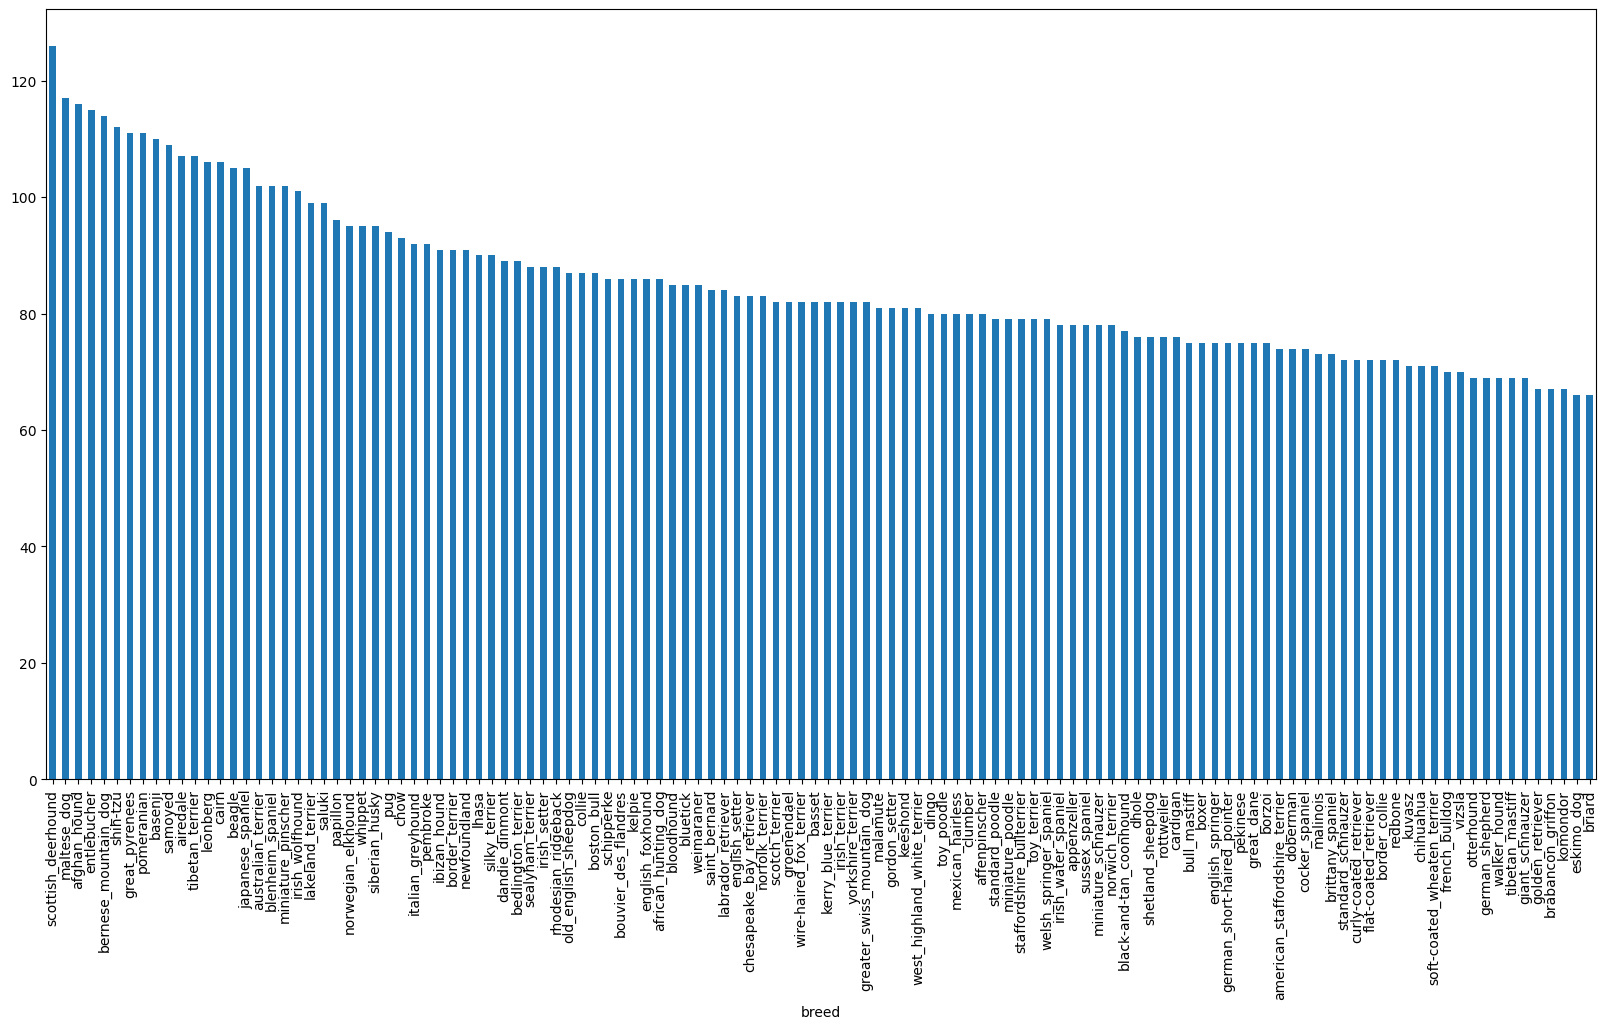

In [14]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [15]:
labels_csv["breed"].value_counts().median()

82.0

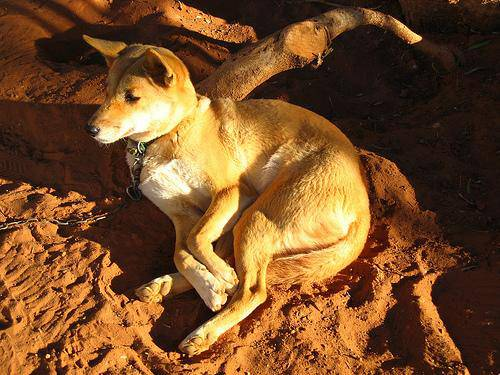

In [16]:
from IPython.display import Image
Image("drive/MyDrive/Dog_Breed_Identification_project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

# Getting Images and Labels
  Get list of Image File pathnames.

In [17]:
filenames=["drive/MyDrive/Dog_Breed_Identification_project/train/"+ filename +".jpg" for filename in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog_Breed_Identification_project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [18]:
#Checking if number of filenames match number of images
import os
if len(os.listdir("drive/MyDrive/Dog_Breed_Identification_project/train/"))==len(filenames):
  print("Filenames match.Proceed!")
else:
  print("Filenames number not match.")

Filenames match.Proceed!


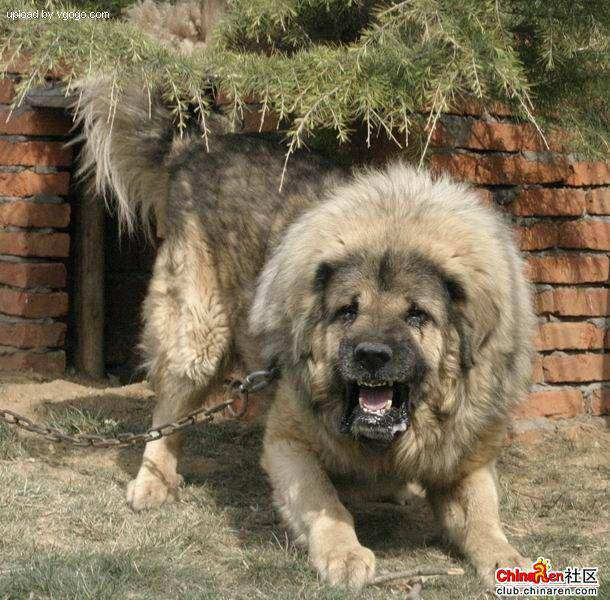

In [19]:
Image(filenames[9000])

In [20]:
labels_csv["breed"][9000]

'tibetan_mastiff'

###  Converting Labels into numbers

In [21]:
import numpy as np
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
len(labels)

10222

### Checking Missing Data

In [23]:
if len(labels)==len(filenames):
  print("No missing Data!")
else:
  print("Some Data is Missing!")

No missing Data!


#### Finding unique labels ie. breeds.

In [24]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

#### Turning every label into boolean array

In [25]:
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [26]:
len(boolean_labels)

10222

In [27]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Splitting Data into Training and Validation Data set

In [28]:
x=filenames
y=boolean_labels

In [29]:
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=1)
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [31]:
x_train[:5],y_train[:2]

(['drive/MyDrive/Dog_Breed_Identification_project/train/0943d1d4677ab876b52468096baaa2ce.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/187b3a867bb68860208c37aaf43d2115.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/182c9134e07c883dfdc2acfb21184810.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/013c43f40f0fb13fa25ac0c2a70fd48f.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/0ca9280205bd68d201e1d708db3f209d.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fals

# Preprocessing (Turning Images into Tensors)

Function should:
  1. Take image filepath as input.
  2. Use TensorFlow to read the file and save it to a variable, `image`.
  3. Turn `image` (.jpg) into tensors.
  4. Normalize `image` Convert colour channel values fro 0-255 to 0 to 1.
  5. Resize `image` to be in shape of (250,250).
  6. Return the modified `image`.

In [32]:
from matplotlib.pyplot import imread
image=imread(filenames[9000])
image.shape

(600, 610, 3)

In [33]:
image[:2]

array([[[124, 129,  88],
        [150, 155, 114],
        [122, 127,  86],
        ...,
        [ 80,  85,  55],
        [ 66,  73,  40],
        [ 66,  73,  40]],

       [[144, 149, 108],
        [153, 158, 117],
        [121, 126,  85],
        ...,
        [ 58,  63,  33],
        [ 65,  72,  41],
        [ 65,  72,  39]]], dtype=uint8)

In [34]:
image.max(), image.min()

(255, 0)

In [35]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 610, 3), dtype=uint8, numpy=
array([[[124, 129,  88],
        [150, 155, 114],
        [122, 127,  86],
        ...,
        [ 80,  85,  55],
        [ 66,  73,  40],
        [ 66,  73,  40]],

       [[144, 149, 108],
        [153, 158, 117],
        [121, 126,  85],
        ...,
        [ 58,  63,  33],
        [ 65,  72,  41],
        [ 65,  72,  39]]], dtype=uint8)>

## Function Creation

In [36]:
IMG_SIZE=224

def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes file patrh as input and gives tensor as output
  """
  image=tf.io.read_file(image_path)
  #Converting image to numerical tensor with 3 colour channels ie. Red, Green, Blue
  image=tf.image.decode_jpeg(image,channels=3)
  #Converting colour channel values from 0-255 to 0 to 1.
  image=tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

## Turning Data into Batches
   As trying to process all the 10000+ images at once will be difficult (will be slow) as they won't fit in GPU's memory.
   Let's make batch size 20 ie. 20 images at a time.

   In order to use TensorFlow effectively, data should be in the form of tensor couples like:
   `(image,label)`


### Function for returning tuple (image, label)

In [37]:
def get_image_label(image_path,label):
  """
  Takes file path and label, processes image and returns tuple of (image, label)
  """
  image=process_image(image_path)
  return image,label

In [38]:
(process_image(x[32]),tf.constant(y[32]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[2.1821149e-02, 9.6624359e-02, 3.9579429e-02],
         [3.1774971e-01, 3.9849764e-01, 3.4007537e-01],
         [1.9432701e-02, 7.9156667e-02, 2.5785400e-02],
         ...,
         [0.0000000e+00, 2.8685225e-02, 7.3815696e-03],
         [1.9170512e-03, 4.3444425e-02, 1.0881329e-02],
         [1.4592139e-02, 6.1650965e-02, 2.2435278e-02]],
 
        [[1.0875124e-01, 1.8718261e-01, 1.4012378e-01],
         [1.7272735e-04, 4.8262980e-02, 1.3897765e-03],
         [6.4935260e-02, 1.2673499e-01, 8.3912849e-02],
         ...,
         [1.0160362e-04, 1.2352975e-02, 9.8086741e-05],
         [1.2390460e-02, 5.1494777e-02, 2.0159349e-02],
         [2.1063086e-02, 6.0197882e-02, 2.8852297e-02]],
 
        [[5.7045322e-02, 1.2597507e-01, 7.8916252e-02],
         [1.0413458e-02, 6.4111114e-02, 2.4974128e-02],
         [1.2249038e-02, 6.4907044e-02, 2.5636028e-02],
         ...,
         [2.1364413e-02, 4.3656677e-02, 1.5458719e-02],


In [39]:
BATCH_SIZE=20

def create_data_batches(x,y=None, batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Convert Data (x abd y pairs) into batches.
  Shuffles data if it's training data but doesn't shuffle validation data.
  Also accepts test data as input (no labels).
  """

  # If Test Data (No Labels)
  if test_data:
    print("Creating Test Data Batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))   #Only filepaths No Labels
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If Valid Data (No shuffling required)
  elif valid_data:
    print("Creating Valid Data Batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))      #Filepaths,Labels
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating Training Data Batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    # Shuffling before Mapping is faster
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_image_label)
    data_batch=data.batch(BATCH_SIZE)
  return data_batch

In [40]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

Creating Training Data Batches...
Creating Valid Data Batches...


In [41]:
#Checking Different attributes of Data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

###Visualizing Data Batches

In [42]:
import matplotlib.pyplot as plt

def show_20_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(20):
    # 4 rows 4 columns i+1 index
    ax=plt.subplot(5,4,i+1)
    plt.imshow(images[i])
    #gives label name where label has highest value(ie. True or 1) in labels list in unique breeds.
    plt.title(unique_breeds[labels[i].argmax()])
    # To turn gridlines off
    plt.axis("off")


In [43]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Turn `train_data` `val_data` into an iterator type. (Right now it is Batch Dataset type.)

In [44]:
#Everytime this cell is run images will be new as data is shuffled
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[1.94105785e-02, 2.72537153e-02, 0.00000000e+00],
          [2.78011225e-02, 3.56442593e-02, 0.00000000e+00],
          [3.85854356e-02, 4.64285761e-02, 3.29131819e-03],
          ...,
          [3.32639068e-01, 4.02836263e-01, 7.00689256e-02],
          [3.54586780e-01, 4.01995718e-01, 1.44051179e-01],
          [3.39167804e-01, 3.83250475e-01, 1.46065548e-01]],
 
         [[2.92016827e-02, 3.70448194e-02, 0.00000000e+00],
          [3.12077980e-02, 3.90509330e-02, 0.00000000e+00],
          [3.25452089e-02, 4.03883457e-02, 8.72228848e-05],
          ...,
          [3.45606714e-01, 4.15564746e-01, 9.46612209e-02],
          [3.53031844e-01, 4.02555972e-01, 1.33298457e-01],
          [3.45346540e-01, 3.86733115e-01, 1.40759677e-01]],
 
         [[2.66456604e-02, 3.36834751e-02, 0.00000000e+00],
          [2.25140080e-02, 2.95518227e-02, 0.00000000e+00],
          [1.79324858e-02, 2.49703024e-02, 0.00000000e+00],
          ...,
          [3.15166384e-01, 3.80712658e-01, 8.2608

In [45]:
len(train_images),len(train_labels)

(20, 20)

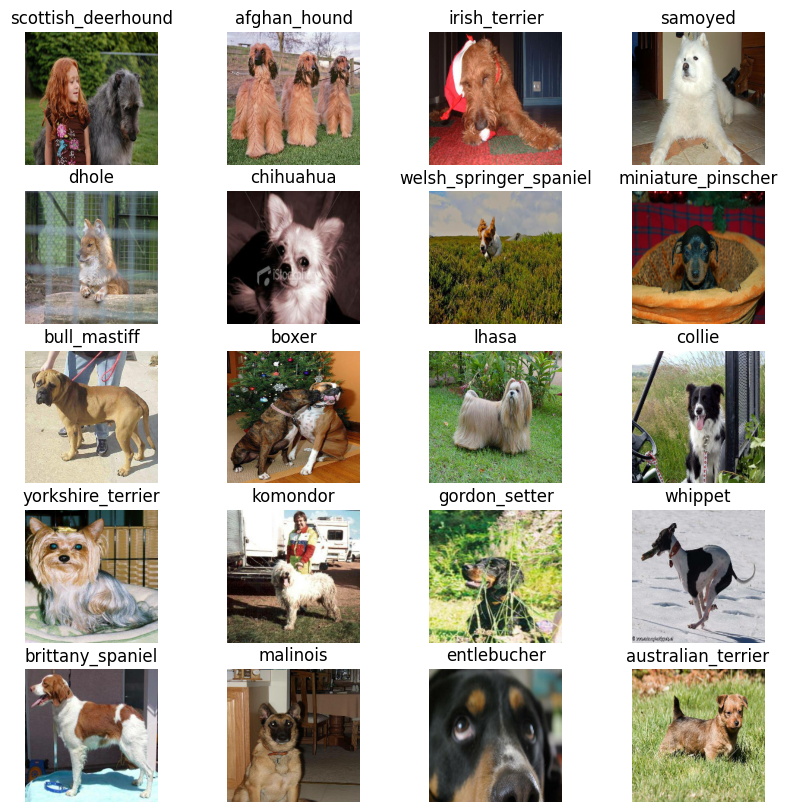

In [46]:
show_20_images(train_images,train_labels)

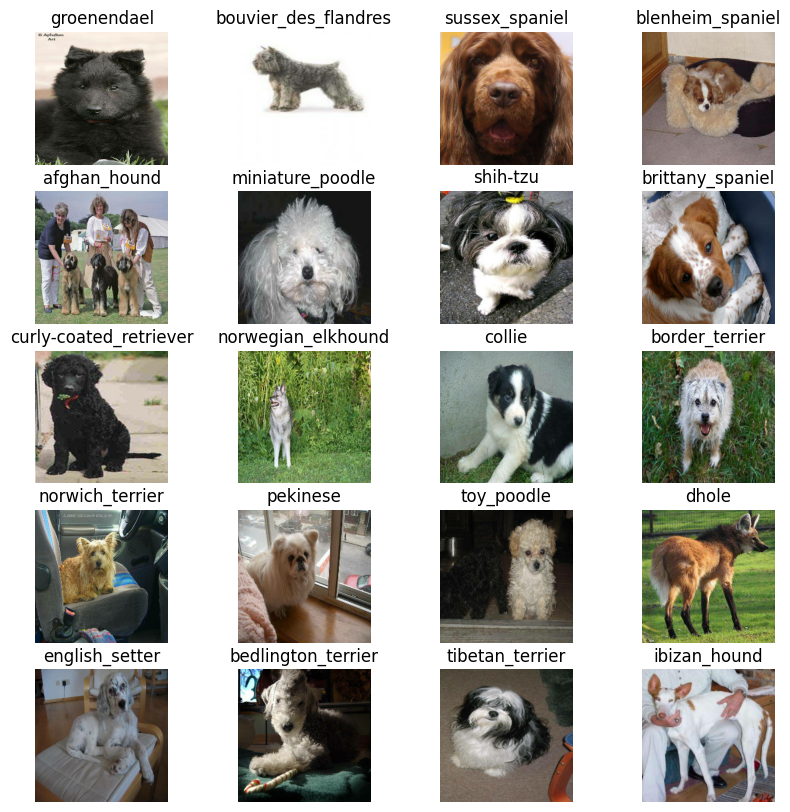

In [47]:
val_images, val_labels=next(val_data.as_numpy_iterator())
show_20_images(val_images,val_labels)

# Building a Model
   Things to define:
   1. The input shape (image shape in the form of tensor) to the model.
   2. The output shape (labels shape in the form of tensor) of the model.
   3. The URL of the Model we want to use.

URL is from TensorFlow Hub : "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

We are goint to use Sequential Keras API

In [48]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]       #batch, height, width, color channels
OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL="https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

### Puttng input, output, model into Keras Deep Learning Model.
  * The Function Should :
    1. INPUT_SHAPE, OUTPUT_SHAPE, Model as parameters.
    2. Define layers in Keras MOdel in Sequential Model.
    3. Compiles Model (It should be evaluated and improved).
    4. Builds the Model (Tells Model input shape it will be getting).
    5. Returns the Model.

Refer: https://www.tensorflow.org/guide/keras


In [49]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building Model with:", MODEL_URL)

  #Setting up the layers
  model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape[1:]),  #Layer 1 (Input layer)
    tf.keras.layers.Lambda(lambda x: hub.KerasLayer(MODEL_URL)(x)),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")   #Layer 2 (Output Layer)
])

  #Compile The Model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build The Model
  model.build(INPUT_SHAPE)

  return model

##### `softmax` is used for Multi class classification similar to `sigmoid` is used for Binary classification.

In [50]:
model=create_model()
model.summary()

Building Model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         120,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,240 (469.69 KB)

 Trainable params: 120,240 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

###  Creating callbacks
Callbacks are helper functions a model can use. It checks model's progress, saves the progress, stop training it early if the model stops improving.

We are going to create two callbacks here, one for TensorBoard (used to understand model's progress and improve model's performance by updating hyperparameters) to track model's progress and another for early stopping thereby preventing it from training too long.

#### TensorFlow Callback
Steps:                                               
1. Load TensorBoard notebook extension
2. Create TensorFlow Callback to save logs to a directory and pass it to a model's `fit()` function
3. Visualize model's training logs `%tensorboard` magic function



In [51]:
%load_ext tensorboard

In [52]:
import datetime

def create_tensorboard_callback():
  #Creating log directory for storing tensorboard logs
  logdir=os.path.join("drive/MyDrive/Dog_Breed_Identification_project/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback
It helps prevent model from overfitting by stopping training if a certain evaluation metric stops improving.

Refer: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [53]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

# Training the Model
Model is trained on subset of 1000 images

In [54]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100,step:10}

## Creating Fuction
Function should:
1. Create a model using `create_model()`
2. Set up Tensorboard callback using `create_tensorboard_callback()`
3. Call `fit()` function. Pass it training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callback
4. Return the model

In [55]:
def train_model():
  model=create_model()
  tensorboard=create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  return model

Epochs means number of times model should be trained on training set. validation_frq means number of times model should be tested on validation set. First epoch requires longest time compared to the remaining.

In [ ]:
model=train_model()

Building Model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 292s 7s/step - accuracy: 0.0541 - loss: 5.0788 - val_accuracy: 0.3500 - val_loss: 2.9509
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7494 - loss: 1.3838 - val_accuracy: 0.5850 - val_loss: 1.8130
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9730 - loss: 0.3759 - val_accuracy: 0.6300 - val_loss: 1.5383
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9969 - loss: 0.1664 - val_accuracy: 0.6550 - val_loss: 1.4210
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9999 - loss: 0.0984 - val_accuracy: 0.6700 - val_loss: 1.3794
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0685

## Tensorboard

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog_Breed_Identification_project/logs

# Prediction and Evaluation Using Trained Model

## Making Predictions

In [ ]:
predictions=model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
len(y_val)

In [ ]:
predictions[0]

In [ ]:
np.sum(predictions[0])

## Unbatch the batched dataset (validation) and compare the predicted labels with actual ones (truth).

In [ ]:
def get_the_prediction(prediction_probabilities):
  pred_label=unique_breeds[np.argmax(prediction_probabilities)]
  return pred_label
get_the_prediction(predictions[0])

In [ ]:
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels=unbatchify(val_data)
val_images[0], val_labels[0]

In [ ]:
get_the_prediction(val_labels[0])

## Plot the image with labels (predicted and actual with confidence

In [ ]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  pred_label=get_the_prediction(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label==true_label:
    color="green"
  else:
    color="red"

  plt.title("{}{:2.0f}%{}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=0)

## Plot top 10 images according to confidences

In [ ]:
def top_10_conf(prediction_probabilities,labels,n=1):
  pred_prob,true_label=prediction_probabilities[n],labels[n]

  pred_label=get_the_prediction(pred_prob)

  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  top_10_confidence_values=pred_prob[top_10_pred_indexes]
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),top_10_confidence_values,color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation="vertical")

  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

In [ ]:
top_10_conf(predictions,val_labels,1)

In [ ]:
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  top_10_conf(prediction_probabilities=predictions,labels=val_labels,n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

# Saving and Reloading Trained Model

In [ ]:
def save_model(model,suffix=None):
  modeldir=os.path.join("drive/MyDrive/Dog_Breed_Identification_project/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+"-"+suffix+".h5"
  print(f"Saving Model to: {model_path}...")
  model.save(model_path)
  print(model_path)

In [ ]:
def load_model(model_path):
  print(f"Loading model from: {model_path}...")
  model=create_model()
  model.load_weights(model_path)
  return model

In [ ]:
save_model(model,suffix="1000-images-MobileNetV2-Adam")

In [ ]:
loaded_model_1000_images=load_model("drive/MyDrive/Dog_Breed_Identification_project/models/20241223-14491734965381-1000-images-MobileNetV2-Adam.h5")

In [ ]:
model.evaluate(val_data)

In [ ]:
loaded_model_1000_images.evaluate(val_data)